# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [61]:
from keras import layers, models, datasets

# Load and prepare the MNIST dataset
mnist = datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Build the model using Input layer
model = models.Sequential([
    layers.Input(shape=(28, 28)),  # Use Input layer for specifying input shape
    layers.Flatten(),  # Flatten the input image
    layers.Dense(128, activation='relu'),  # Dense hidden layer
    layers.Dropout(0.2),  # Dropout for regularization
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes (0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=40)

# Evaluate the model
model.evaluate(test_images, test_labels, verbose=2)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8608 - loss: 0.4789
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9537 - loss: 0.1559
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9667 - loss: 0.1078
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9739 - loss: 0.0837
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9785 - loss: 0.0692
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9808 - loss: 0.0635
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9822 - loss: 0.0548
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9840 - loss: 0.0488
Epoch 9/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9861 - loss: 0.0425
Epoch 10/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9865 - loss: 0.0399
Epoch 11/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9886 - loss: 0.0346
Epoch 12/40
1875/1875 ━━━━━━━━

[0.10551467537879944, 0.9804999828338623]

In [62]:
model.save('my_model.keras')


In [63]:

import numpy as np
from PIL import Image
from keras.api.models import load_model

In [64]:
# Function to preprocess the image
def preprocess_image(image_path):
    # Load the image using PIL
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28 pixels
    img = np.array(img)  # Convert to numpy array
    img = img / 255.0  # Normalize the pixel values (same as done for MNIST dataset)
    
    # Reshape the image to match the input shape of the model
    img = img.reshape(1, 28, 28)  # Model expects (1, 28, 28)
    
    return img

In [65]:
test_image_path = './test_image/img.png' # Provide the path to your test image
test_image = preprocess_image(test_image_path)

In [66]:
model = load_model('my_model.keras')
predictions = model.predict(test_image)
predicted_digit = np.argmax(predictions)  # Get the index of the highest probability (the predicted digit)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [67]:
print(f"Predicted digit: {predicted_digit}")

Predicted digit: 5


In [68]:
from ubyte import decode_idx3_ubyte, decode_idx1_ubyte

# Decode images
images = decode_idx3_ubyte('./archive/train-images.idx3-ubyte')
# Decode labels
labels = decode_idx1_ubyte('./archive/train-labels.idx1-ubyte')

print(images.shape)  # Should show (60000, 28, 28)
print(labels.shape)  # Should show (60000,)


Getting platform type...
Your computer's platform type is unix-type system .
Start decoding train-images.idx3-ubyte (the complete directory is ./archive/train-images.idx3-ubyte.)
Opening train-images.idx3-ubyte .
 Successfully opened train-images.idx3-ubyte,used time 0.026700 s.
Decoding header information .
 Magic number: 2051,number of images: 60000,size of images: 28*28.
 Successfully decoded header information,used time 0.026813 s.
Decoding main part.
 Decoded 1259 sheets,used time 0.100022 s,etc 4.666872 s.
 Decoded 10214 sheets,used time 0.500017 s,etc 2.437326 s.
 Decoded 15796 sheets,used time 0.700022 s,etc 1.959051 s.
 Decoded 18701 sheets,used time 0.800009 s,etc 1.766813 s.
 Decoded 21527 sheets,used time 0.900025 s,etc 1.608606 s.
 Decoded 24351 sheets,used time 1.000019 s,etc 1.464074 s.
 Decoded 27467 sheets,used time 1.100009 s,etc 1.302974 s.
 Decoded 30331 sheets,used time 1.200025 s,etc 1.173913 s.
 Decoded 35546 sheets,used time 1.400014 s,etc 0.963223 s.
 Decoded 4

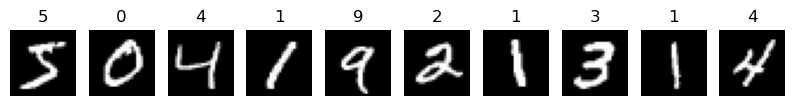

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import struct

def read_idx(filename):
    """Read an IDX file and return a NumPy array."""
    with open(filename, 'rb') as f:
        # Read the magic number and dimensions
        magic, num_items = struct.unpack('>II', f.read(8))
        
        # Check for magic number validity
        if magic == 2051:  # Images magic number
            rows, cols = struct.unpack('>II', f.read(8))  # Read image dimensions
            return np.fromfile(f, dtype=np.uint8).reshape(num_items, rows, cols)
        elif magic == 2049:  # Labels magic number
            return np.fromfile(f, dtype=np.uint8).reshape(num_items, 1)
        else:
            raise ValueError(f"Invalid magic number: {magic}")

# Load images and labels
images = read_idx('./archive/train-images.idx3-ubyte')  # Path to your images file
labels = read_idx('./archive/train-labels.idx1-ubyte')  # Path to your labels file

# Display some images
num_images = 10  # Number of images to display
plt.figure(figsize=(10, 2))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(images[i], cmap='gray')  # images[i] is already reshaped to (28, 28)
    plt.title(labels[i][0])  # Display the label
    plt.axis('off')  # Hide axes

plt.show()
